In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd

In [23]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

##  Precipitation Analysis

###### 1. Design a query to retrieve the last 12 months of precipitation data

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# finding the latest date

latest_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())

latest_date

('2017-08-23')

In [31]:
# strptime() argument must be string so we are extracting string from query object

latest_date = list(np.ravel(latest_date))[0]
latest_date

'2017-08-23'

In [32]:
# Convert date string to datetime object

latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')
latest_date

datetime.datetime(2017, 8, 23, 0, 0)

In [33]:
# Extract year, month, and day as integers from "latest_date"

latest_year = int(dt.datetime.strftime(latest_date, '%Y'))
latest_month = int(dt.datetime.strftime(latest_date, '%m'))
latest_day = int(dt.datetime.strftime(latest_date, '%d'))
#latest_year
#latest_month
#latest_day

In [34]:
# Calculate the date 1 year ago from the last data point in the database

year_before = dt.date(latest_year, latest_month, latest_day) - dt.timedelta(days=365)
year_before

datetime.date(2016, 8, 23)

In [35]:
# Perform a query to retrieve the data and precipitation scores

rain_data = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_before)
             .order_by(Measurement.date).all())

#rain_data

###### 2.  Load the query results into a Pandas DataFrame and set the index to the date column.

In [36]:
# Create data frame from the query "rain_data"

rain_df = pd.DataFrame(rain_data)

rain_df.head()
#rain_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [37]:
rain_df1 = rain_df.rename(columns={'date':'Date','prcp':'Precipitation'})
rain_df1.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [38]:
# Set index to the "date" column

rain_df1_set_index = rain_df1.set_index('Date')
rain_df1_set_index.head()
#rain_df1_set_index

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [39]:
# Sort the data frame by "date"

rain_df1_sort_by_Date = rain_df1_set_index.sort_values(by=['Date'], ascending=True)
rain_df1_sort_by_Date.head()
#rain_df1_sort_by_Date

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


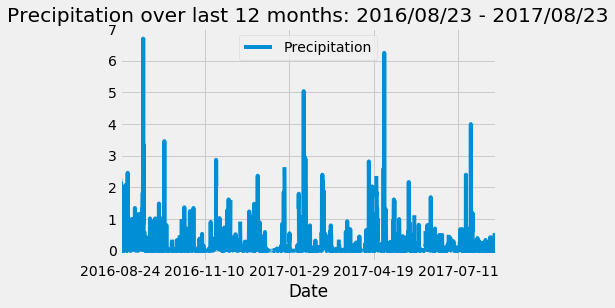

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the precipitation over the last 12 months.

rain_df1_sort_by_Date.plot(title="Precipitation over last 12 months: 2016/08/23 - 2017/08/23")
# To save figure
plt.savefig("./output/precipitation.png", bbox_inches="tight")
# To show figure
plt.show()


In [76]:
# Use Pandas to calcualte the summary statistics for the precipitation data

rain_df1_sort_by_Date.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


##  Station Analysis

###### 1. Design a query to calculate the total number of stations.

In [42]:
# Design a query to show how many stations are available in this dataset

station_count = session.query(Station).count()
print(f"Station Count: {station_count}")

Station Count: 9


######  2. Design a query to find the most active stations.

In [43]:
# Design a query to find the most active stations

# List the stations and observation counts in descending order
# What are the most active stations? (i.e. what stations have the most rows)?

stations_observation_counts = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())


stations_observation_counts



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# The most active station id
station_id = stations_observation_counts[0][0]
station_id

'USC00519281'

In [45]:
# The most active station name

most_active_station_name = (session.query(Station.name).filter_by(station = station_id))

#most_active_station_name


most_active_station_name = most_active_station_name[0][0]
most_active_station_name



'WAIHEE 837.5, HI US'

In [46]:
# Print the most active station's id and name

print(f"The most active station is {station_id}: {most_active_station_name}.")


The most active station is USC00519281: WAIHEE 837.5, HI US.


In [47]:
# Query for highest temperature
highest_temp = (session.query(Measurement.tobs).filter(Measurement.station == station_id)
                .order_by(Measurement.tobs.desc()).first())


highest_temp


highest_temp = highest_temp[0]
highest_temp


85.0

In [48]:
# Print the highest temperature

print(f"The highest temperature recorded there is {highest_temp} degrees Farenheit.")

The highest temperature recorded there is 85.0 degrees Farenheit.


In [49]:
# Query for lowest temperature
lowest_temp = (session.query(Measurement.tobs).filter(Measurement.station == station_id)
               .order_by(Measurement.tobs.asc()).first())


lowest_temp = lowest_temp[0]
lowest_temp



54.0

In [50]:
# Print the lowest temperature

print(f"The lowest temperature recorded there is {lowest_temp} degrees Farenheit.")


The lowest temperature recorded there is 54.0 degrees Farenheit.


In [51]:
# Query for average temperature
average_temp = (session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_id))

#average_temp 

average_temp = '{0:.3}'.format(average_temp[0][0])
average_temp


'71.7'

In [52]:
# Print the average temperature

print(f"The average temperature recorded there is {average_temp} degrees Farenheit.")

The average temperature recorded there is 71.7 degrees Farenheit.


###### 3. Design a query to retrieve the last 12 months of temperature observation data (tobs).

In [53]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.



# Query for the last year of temperature data
temp_data = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > year_before)
                   .filter(Measurement.station == station_id)
                   .order_by(Measurement.date)
                   .all())


#temp_data

In [54]:
# Convert query object to data frame


temp_df = pd.DataFrame(temp_data)
temp_df.head()
#temp_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


In [55]:
# Set index as "date"

temp_df_set_index = temp_df.set_index('date')
temp_df_set_index.head()
#temp_df_set_index

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


In [56]:
# Sort dataframe by date

temp_df_sort_date = temp_df_set_index.sort_values(['date'], ascending=True)
temp_df_sort_date.head()

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


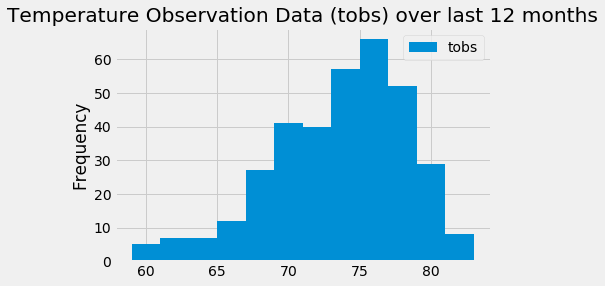

In [57]:
# Histogram plot with pandas
# Plot the results as a histogram with bins=12.

temp_df_sort_date.plot(title="Temperature Observation Data (tobs) over last 12 months", kind='hist', bins=12)

plt.savefig("./output/station-histogram.png",bbox_inches="tight")
plt.show()

##  Temperature Analysis

In [58]:
# The starter notebook contains a function called calc_temps 
# that will accept a start date and end date in the format %Y-%m-%d 
# And return the minimum, average, and maximum temperatures for that range of dates.


def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Function usage example(use any date between 2010-01-01 and 2017-08-23)
print(calc_temps('2010-06-09', '2010-06-15'))


[(69.0, 75.57692307692308, 83.0)]


In [59]:
# Set trip dates and previous dates
trip = '2019-06-09 to \n 2019-06-15'
# choose a startdate and enddate in between 2010-01-01 and 2017-08-23
# trip date range should be approximately 3-15 days
tripStartDate = '2017-06-08'
tripEndDate = '2017-06-15'

#calculate the tmin, tavg, and tmax 
tripTemps = calc_temps(tripStartDate, tripEndDate)

tripTemps

[(72.0, 77.0576923076923, 83.0)]

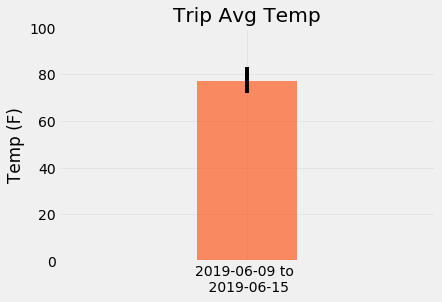

In [60]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


minTripTemp = tripTemps[0][0]
avgTripTemp = tripTemps[0][1]
maxTripTemp = tripTemps[0][2]

minError = avgTripTemp - minTripTemp
maxError = maxTripTemp - avgTripTemp

errorBars = np.array([[minError], [maxError]])


plt.bar(trip, avgTripTemp, yerr=errorBars, color = 'orangered', alpha = 0.6)
#plt.bar("abc",avgTripTemp, yerr=errorBars, color = 'orangered', alpha = 0.6)

plt.ylim(0, 100)
plt.xlim(-1.5, 1.5)
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=0.3)
plt.savefig("./output/temperature.png", bbox_inches="tight")
plt.show()


## Daily Rainfall Average

In [61]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount 
# And list the station, name, latitude, longitude, and elevation

sel = ([Station.station, 
        Station.name, 
        func.sum(Measurement.prcp), 
        Station.latitude, 
        Station.longitude, 
        Station.elevation
       ])

stationRain = (session.query(*sel).filter(Station.station == Measurement.station)
               .filter(Measurement.date >= tripStartDate)
               .filter(Measurement.date <= tripEndDate)
               .group_by(Station.station)
               .order_by(func.sum(Measurement.prcp).desc()).all())

stationRain


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  4.66,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  2.63,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  1.6400000000000001,
  21.5213,
  -157.8374,
  7.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 1.48, 21.4234, -157.8015, 14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.6100000000000001,
  21.33556,
  -157.71139,
  19.5),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  0.13999999999999999,
  21.2716,
  -157.8168,
  3.0),
 ('USC00517948', 'PEARL CITY, HI US', None, 21.3934, -157.9751, 11.9)]

In [62]:
# Convert query object to data frame
stationRainTable = pd.DataFrame(np.array(stationRain))
#rename columns
stationRainTable = stationRainTable.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precipitation", 3: "Latitude", 
                                                    4: "Longitude", 5: "Elevation"})

stationRainTable

,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",4.66,21.3331,-157.803,152.4
1,USC00519281,"WAIHEE 837.5, HI US",2.63,21.4517,-157.849,32.9
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.64,21.5213,-157.837,7
3,USC00513117,"KANEOHE 838.1, HI US",1.48,21.4234,-157.802,14.6
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.61,21.3356,-157.711,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",0.14,21.2716,-157.817,3
6,USC00517948,"PEARL CITY, HI US",None,21.3934,-157.975,11.9


#  OPTIONAL CHALLENGE ASSIGNMENT

##  Daily Normals

In [63]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
# You are provided with a function called daily_normals that will calculate the daily normals for a specific date.
# This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.


def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [64]:
# Create a list of dates for your trip in the format %m-%d.
# Use the daily_normals function to calculate the normals for each date string and append the results to a list.


# Set start and end date for the trip
startDate = "2019-06-09"
endDate = "2019-06-15"

# Calculate trip length
startNum = int(startDate[-2:])
endNum = int(endDate[-2:])
tripLength = endNum - startNum + 1

# Start date as datetime object
startDate = dt.datetime.strptime(startDate, '%Y-%m-%d')

# List dates (MM-DD) of trip
dateList = [dt.datetime.strftime(startDate + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, tripLength)]

# Calculate normals for each date
tripNormals = [daily_normals(date) for date in dateList]
tripNormals


[[(69.0, 75.15254237288136, 81.0)],
 [(68.0, 75.14285714285714, 81.0)],
 [(69.0, 76.01960784313725, 84.0)],
 [(66.0, 75.66666666666667, 83.0)],
 [(68.0, 75.66666666666667, 81.0)],
 [(69.0, 75.62711864406779, 81.0)],
 [(67.0, 75.40350877192982, 81.0)]]

In [65]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


# Extract normals into a list of lists
tripNormals = [np.array(normal[0]) for normal in tripNormals]

# Convert normals list into a data frame
normalsTable = pd.DataFrame(tripNormals)

# Add date column
normalsTable["Date"] = dateList

# Set index and rename columns
normalsTable = normalsTable.set_index("Date")
normalsTable = normalsTable.rename(columns={0: "tmin", 1: "tavg", 2: "tmax"})
normalsTable

,tmin,tavg,tmax
Date,,,
06-09,69.0,75.152542,81.0
06-10,68.0,75.142857,81.0
06-11,69.0,76.019608,84.0
06-12,66.0,75.666667,83.0
06-13,68.0,75.666667,81.0
06-14,69.0,75.627119,81.0
06-15,67.0,75.403509,81.0


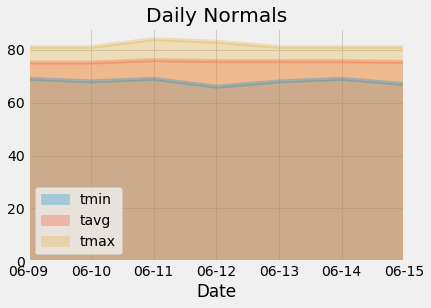

In [66]:
# Plot with pandas
normalsTable.plot.area(title="Daily Normals", stacked=False, alpha=0.3)
#save figure
plt.savefig("./output/daily-normals.png", bbox_inches="tight")
# show figure
plt.show()